## Machine Learning in Finance 

### Import key libraries

In [22]:
from datetime import datetime
import numpy as np
import pandas as pd
import sklearn
import pandas_datareader.data as web 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

### Function - Create dataset

In [23]:
def create_dataset(stock_symbol, start_date, end_date, lags=5):
    # fetch the stock data from Yahoo Finance 
    df = web.DataReader(stock_symbol, "yahoo", start_date, end_date)
    print('The raw data frame')
#     print(df.head(7))
    
    # Create a new dataframe 
    # we want to use additional features: lagged returns... today's, yesterday's return etx
    df['Today'] = df['Adj Close'].pct_change()*100
    
    # Create the lagged percentage return columns
    for i in range(0, lags):
        df["Lag%s" % str(i+1)] = df['Adj Close'].pct_change(i+2)*100
        
    print('Lag return')
#     print(df.head(7))
    
    # "Direction" column (+1 or -1) indicating an up/down day 
    df["Direction"] = np.sign(df["Today"])
    
    # Because of the shifts there are NaN values... we want to get rid of those NaN 
    df.drop(df.index[:6], inplace=True)
    
    return df
    

### Run the model

The raw data frame
Lag return
Accuracy of logistic regression model: 0.699
Confusion matrix: 
[[27 14]
 [17 45]]


/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


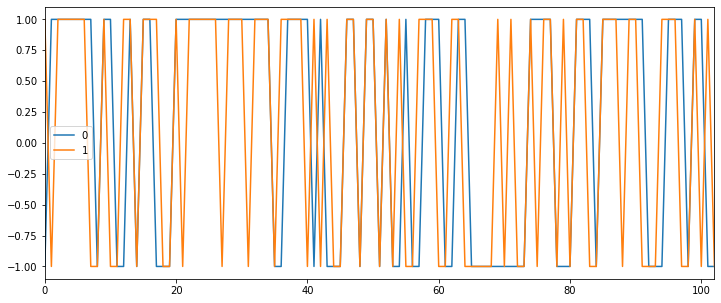

In [28]:
# Create a lagged series of WKHS
data = create_dataset(stock_symbol = ['AAPL'], start_date=datetime(2012,1,1), end_date=datetime(2017,5,31), lags=5)

# Use the prior two days of returns as predictor 
# Values, with directions as the response 
X = data[["Lag1", "Lag2", "Lag3","Lag4"]]
y = data["Direction"]

# The test data is split into two parts: Before and after 1st Jan 2005
start_test = datetime(2017,1,1)

# Create training and test sets 
X_train = X[X.index < start_test]
X_test = X[X.index >= start_test]
y_train = y[y.index < start_test]
y_test = y[y.index >= start_test]

# Create a logistic regression as the machine learning model 
model = LogisticRegression()

# Train the model on the training set 
model.fit(X_train, y_train)

# Train the model on the training set 
pred = model.predict(X_test)

# Output the hit-rate and the confusion matrix for the model 
print("Accuracy of logistic regression model: %0.3f" % model.score(X_test, y_test))
print("Confusion matrix: \n%s" % confusion_matrix(pred, y_test))

import matplotlib.pyplot as plt 
%matplotlib inline
pd.DataFrame(zip(pred,y_test)).plot.line(figsize=(12,5))
plt.show()